<a href="https://colab.research.google.com/github/PALLAVI-web2002/predicting-coffee-sales-ml/blob/main/COVID_19_Clinical_Trials_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
 import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Step 2: Load the Dataset

In [26]:
# Load the dataset
df = pd.read_csv('/content/sample_data/covid_19_clean_complete.csv', index_col=0)

# Display basic information
print("Dataset shape:", df.shape)
print("\nRows:", df.index.tolist())

Dataset shape: (49068, 9)

Rows: [nan, nan, nan, nan, nan, nan, nan, nan, 'Australian Capital Territory', 'New South Wales', 'Northern Territory', 'Queensland', 'South Australia', 'Tasmania', 'Victoria', 'Western Australia', nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 'Alberta', 'British Columbia', 'Manitoba', 'New Brunswick', 'Newfoundland and Labrador', 'Nova Scotia', 'Ontario', 'Prince Edward Island', 'Quebec', 'Saskatchewan', nan, nan, nan, 'Anhui', 'Beijing', 'Chongqing', 'Fujian', 'Gansu', 'Guangdong', 'Guangxi', 'Guizhou', 'Hainan', 'Hebei', 'Heilongjiang', 'Henan', 'Hong Kong', 'Hubei', 'Hunan', 'Inner Mongolia', 'Jiangsu', 'Jiangxi', 'Jilin', 'Liaoning', 'Macau', 'Ningxia', 'Qinghai', 'Shaanxi', 'Shandong', 'Shanghai', 'Shanxi', 'Sichuan', 'Tianjin', 'Tibet', 'Xinjiang', 'Yunnan', 'Zhejiang', nan, nan, nan, nan, nan, nan, nan, nan, nan, 'Faroe Islands', 'Greenland', nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, n

In [27]:
display(df)

,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
Province/State,,,,,,,,,
NaN,Afghanistan,33.939110,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
NaN,Albania,41.153300,20.168300,2020-01-22,0,0,0,0,Europe
NaN,Algeria,28.033900,1.659600,2020-01-22,0,0,0,0,Africa
NaN,Andorra,42.506300,1.521800,2020-01-22,0,0,0,0,Europe
NaN,Angola,-11.202700,17.873900,2020-01-22,0,0,0,0,Africa
...,...,...,...,...,...,...,...,...,...
NaN,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
NaN,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
NaN,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa


Step 3: Initial Data Exploration

In [28]:
# Display first 5 rows
print("First 5 rows:")
df.head(5)

# Check data types
print("\nData types:")
print(df.dtypes)

# Identify categorical and numerical features
categorical_features = df.select_dtypes(include='object').columns
numerical_features = df.select_dtypes(exclude='object').columns

print("\nCategorical features:", categorical_features.tolist())
print("Numerical features:", numerical_features.tolist())

First 5 rows:

Data types:
Country/Region     object
Lat               float64
Long              float64
Date               object
Confirmed           int64
Deaths              int64
Recovered           int64
Active              int64
WHO Region         object
dtype: object

Categorical features: ['Country/Region', 'Date', 'WHO Region']
Numerical features: ['Lat', 'Long', 'Confirmed', 'Deaths', 'Recovered', 'Active']


Step 4: Missing Data Analysis

Missing data percentage:
Country/Region    0.0
Lat               0.0
Long              0.0
Date              0.0
Confirmed         0.0
Deaths            0.0
Recovered         0.0
Active            0.0
WHO Region        0.0
dtype: float64


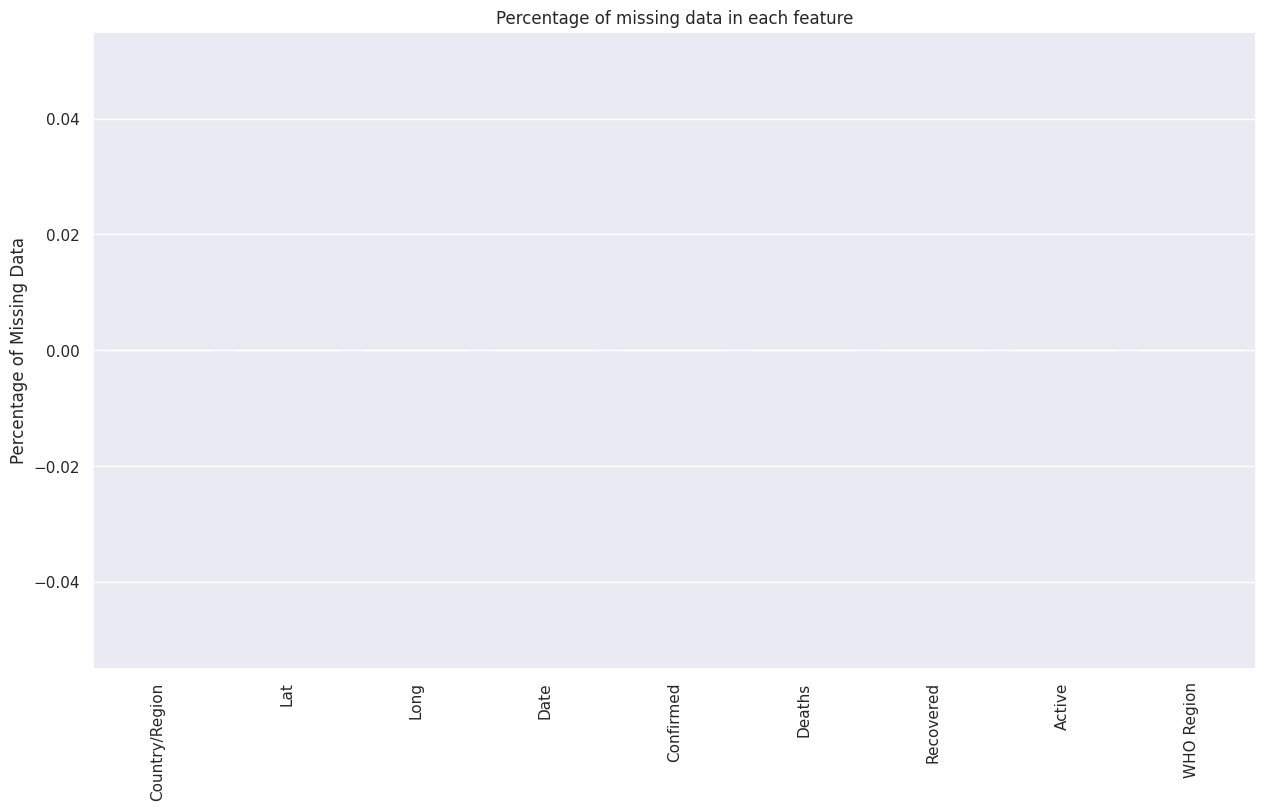

In [29]:
# Calculate percentage of missing data
missing_data = df.isnull().mean() * 100
print("Missing data percentage:")
print(missing_data.sort_values(ascending=False))

# Visualization function for missing data
def visualize_missing_data(data, caption='', ylabel='Percentage of Missing Data'):
    sns.set(rc={'figure.figsize':(15,8.27)})
    plt.xticks(rotation=90)
    sns.barplot(x=data.keys()[:min(40, len(data))].tolist(),
                y=data.values[:min(40, len(data))].tolist())
    plt.title(caption)
    plt.ylabel(ylabel)
    plt.show()

# Visualize missing data
visualize_missing_data(missing_data, 'Percentage of missing data in each feature')

Step 5: Data Cleaning

In [30]:
# Check for duplicates
print(f"Shape before dropping duplicates: {df.shape}")
df.drop_duplicates(inplace=True)
print(f"Shape after dropping duplicates: {df.shape}")

Shape before dropping duplicates: (49068, 9)
Shape after dropping duplicates: (49068, 9)


Feature Engineering - Extract Country

In [37]:
# Extract country from the index and create a new 'Country' column
df['Country'] = df.index

print("Country value counts:")
print(df['Country'].value_counts()[:10])

Country value counts:
Country
Australian Capital Territory    188
New South Wales                 188
Northern Territory              188
Queensland                      188
South Australia                 188
Tasmania                        188
Victoria                        188
Western Australia               188
Alberta                         188
British Columbia                188
Name: count, dtype: int64


Step 6: Data Analysis and Visualization

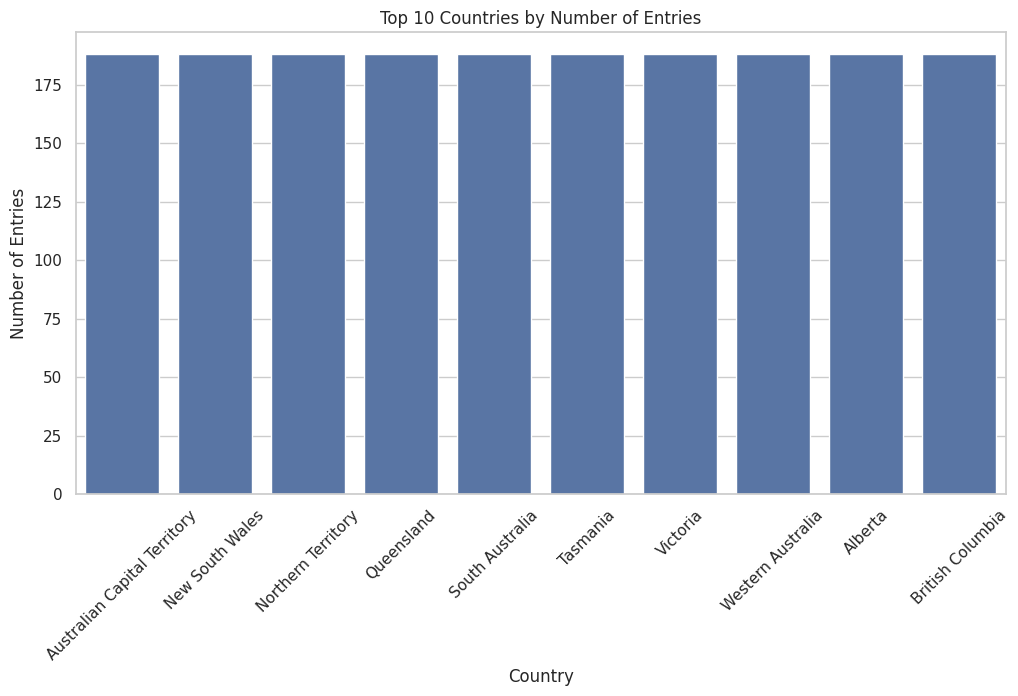

In [31]:
# Set style for plots
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# 1. Top 10 Countries
top_countries = df.index.value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_countries.index, y=top_countries.values)
plt.title('Top 10 Countries by Number of Entries')
plt.xlabel('Country')
plt.ylabel('Number of Entries')
plt.xticks(rotation=45)
plt.show()

Step 7: Summary Statistics

In [32]:
# Display final dataset info
print("Final Dataset Information:")
print(f"Shape: {df.shape}")
print(f"Columns: {df.columns.tolist()}")
print(f"Total trials: {len(df)}")
print(f"Countries represented: {df.index.nunique()}")

# Display summary statistics for numerical columns
print("\nNumerical columns summary:")
print(df.describe())

Final Dataset Information:
Shape: (49068, 9)
Columns: ['Country/Region', 'Lat', 'Long', 'Date', 'Confirmed', 'Deaths', 'Recovered', 'Active', 'WHO Region']
Total trials: 49068
Countries represented: 78

Numerical columns summary:
                Lat          Long     Confirmed         Deaths     Recovered  \
count  49068.000000  49068.000000  4.906800e+04   49068.000000  4.906800e+04   
mean      21.433730     23.528236  1.688490e+04     884.179160  7.915713e+03   
std       24.950320     70.442740  1.273002e+05    6313.584411  5.480092e+04   
min      -51.796300   -135.000000  0.000000e+00       0.000000  0.000000e+00   
25%        7.873054    -15.310100  4.000000e+00       0.000000  0.000000e+00   
50%       23.634500     21.745300  1.680000e+02       2.000000  2.900000e+01   
75%       41.204380     80.771797  1.518250e+03      30.000000  6.660000e+02   
max       71.706900    178.065000  4.290259e+06  148011.000000  1.846641e+06   

             Active  
count  4.906800e+04  
mean 

Step 8: Save Cleaned Data (Optional)

In [33]:
# Save the cleaned dataset for future use
df.to_csv('cleaned_covid_clinical_trials.csv', index=False)
print("Cleaned dataset saved successfully!")

Cleaned dataset saved successfully!
